In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
from utils import *
from model_utils import *
from data import *
from c2d_models import *

Using TensorFlow backend.


In [3]:
test_data = IR_DISTRACTION(isTrain = False, useAllTestData=False)

In [4]:
c2d_model = C2D_AE_128_3x3(isTrain = False, max_value=550)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
c2d_model.model.load_weights("trained_models/C2D_AE_128_3x3_IR_DISTRACTION//model.h5")

In [6]:
model = c2d_model.model

In [7]:
from deepexplain.tensorflow import DeepExplain

In [8]:
xs = np.concatenate((test_data.normal_data, test_data.abnormal_data['text']))

In [9]:
ys = xs # np.array([0] * len(test_data.normal_data) + [1] * len(test_data.abnormal_data['text']))

In [ ]:
%%time
with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
    # Need to reconstruct the graph in DeepExplain context, using the same weights.
    # With Keras this is very easy:
    # 1. Get the input tensor to the original model
    input_tensor = model.layers[0].input
    
    # 2. We now target the output of the last dense layer (pre-softmax)
    # To do so, create a new model sharing the same layers untill the last dense (index -2)
    fModel = Model(inputs=input_tensor, outputs = model.layers[-2].output)
    target_tensor = fModel(input_tensor)
    
#     xs = x_test[0:10]
#     ys = y_test[0:10]
    
#     attributions_gradin = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
#     attributions_sal   = de.explain('saliency', target_tensor, input_tensor, xs, ys=ys)
#     attributions_ig    = de.explain('intgrad', target_tensor, input_tensor, xs, ys=ys)
#     attributions_dl    = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)
#     attributions_elrp  = de.explain('elrp', target_tensor, input_tensor, xs, ys=ys)
    attributions_occ   = de.explain('occlusion', target_tensor, input_tensor, xs, ys=ys)
    
    # Compare Gradient * Input with approximate Shapley Values
    # Note1: Shapley Value sampling with 100 samples per feature (78400 runs) takes a couple of minutes on a GPU.
    # Note2: 100 samples are not enough for convergence, the result might be affected by sampling variance
#     attributions_sv     = de.explain('shapley_sampling', target_tensor, input_tensor, xs, ys=ys, samples=100)

In [25]:
attributions_gradin = (attributions_gradin - attributions_gradin.min())/ (attributions_gradin.max() - attributions_gradin.min())

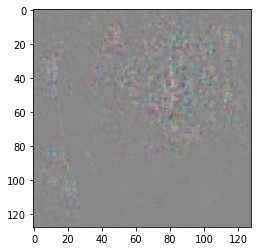

In [31]:
plt.imshow(attributions_gradin[6])

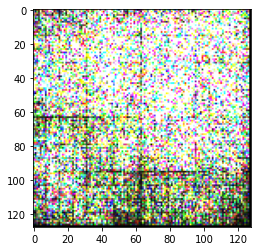

In [22]:
plt.imshow(attributions_sal[20])

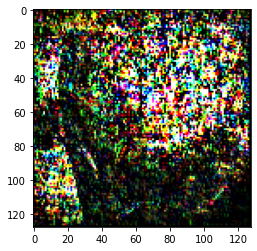

In [24]:
plt.imshow(attributions_ig[60])

In [37]:
attributions_elrp = (attributions_elrp - attributions_elrp.min())/(attributions_elrp.max() - attributions_elrp.min())

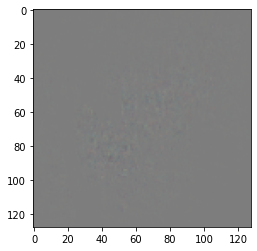

In [38]:
plt.imshow(attributions_elrp[-11])

In [ ]:
plt.imshow(attributions_occ[2])